In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
playstore = pd.read_csv("googleplaystore.csv")
playstore.shape

(10841, 13)

In [3]:
playstore.iloc[10470:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


## prototyping

*    Having a prototype makes it much easier to estimate the cost of a fully fleshed-out project, be it human, technological, or financial resources.
*    Having a more accurate estimate of the cost allows decision-makers to not go through with the project if it doesn't seem profitable enough, or not the best allocation of resources at that point in time.
*    It allows grunt workers (like ourselves) to change and add missing requirements to complete the project. Oftentimes these are overlooked and only spotted later; some examples are missing data, the creation of a new database, the development of an API.
*    It allows business people (like the account manager) to tweak the project's goal.
*    It gives all stakeholders an opportunity to add easily accomplishable side-goals given the main goal, thus maximizing the project's output.


In [4]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
playstore.groupby('Category')['Category'].size().sort_values(ascending = False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [6]:
playstore.drop(10472, inplace= True)
playstore[10470:10475]
# problem row index 10472 is dropped, it's a free app and our project is focused on paid apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [7]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### Several columns which should have a numeric format but whose type is object, like Reviews, Size, Price


*    Reviews: No problems with this column, the only reason why pandas didn't used the proper type for this column was the presence of the problematic row we got rid of in the last screen.

*    Size: You may have noticed in the previous screen that the Size values contains letters like M and k, signifying memory size units. To clean this column, we'll use the function defined in the display code. Don't worry about the details of this function at this point. For now, just know that it takes strings — like the values of the price column — as input, and it returns a float number representing the size in megabytes.

*    Price: Some of the values include a $, it's enough to get rid of it to get the value ready for conversion.


In [8]:
def clean_size(size):
    """ convert file size string to float and megabytes"""
    size = size.replace("M", "")
    if size.endswith('k'):
        size = float(size[:-1]) / 1000
    elif size == "Varies with device":
        size = np.NaN
    else:
        size = float(size)
    return size

In [9]:
playstore['Price'] = playstore['Price'].str.replace("$","").astype("float")
#paid apps
paid = playstore[playstore['Price'] != 0].copy()
paid.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5465,AP Government Review,FAMILY,4.7,3,1.5M,"1,000+",Paid,2.99,Everyone,Education,"March 14, 2017",1.1,4.0.3 and up
8785,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397,9.5M,"50,000+",Paid,3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,4.99,Everyone,Tools,"March 14, 2015",1.4,1.6 and up
4181,G-NetWiFi Pro,TOOLS,3.3,6,1.5M,100+,Paid,5.99,Everyone,Tools,"June 18, 2018",3.2,4.0 and up
8176,King of Math,FAMILY,4.4,766,14M,"10,000+",Paid,2.99,Everyone,Education;Education,"May 22, 2018",1.0.11,2.2 and up


In [10]:
paid.drop('Type', axis = 'columns', inplace = True)
paid.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8825,Ability DS UNO,PRODUCTIVITY,NaN,3,2.3M,50+,2.60,Everyone,Productivity,"May 19, 2014",1.0,1.5 and up
9465,Silence Premium Do Not Disturb,TOOLS,4.5,3356,Varies with device,"10,000+",2.95,Everyone,Tools,"February 17, 2018",Varies with device,Varies with device
5586,Lullaby Add-on for Sleep as Android,HEALTH_AND_FITNESS,3.9,2057,6.2M,"50,000+",1.99,Everyone,Health & Fitness,"October 18, 2017",2.4,4.0 and up
4773,X-Plane to GPS,TOOLS,4.2,161,1.2M,"5,000+",0.99,Everyone,Tools,"March 4, 2018",1.62,4.4 and up
6549,Beck & Bo: Toddler First Words,FAMILY,4.3,41,7.9M,"1,000+",2.99,Everyone,Education;Pretend Play,"May 31, 2018",2.4.2,4.0.3 and up


In [11]:
paid.Reviews = paid.Reviews.astype('int')

In [12]:
paid.Size = paid.Size.apply(clean_size).astype('float')
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    int64  
 4   Size            724 non-null    float64
 5   Installs        800 non-null    object 
 6   Price           800 non-null    float64
 7   Content Rating  800 non-null    object 
 8   Genres          800 non-null    object 
 9   Last Updated    800 non-null    object 
 10  Current Ver     798 non-null    object 
 11  Android Ver     799 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 81.2+ KB


In [13]:
print("Number of rows before dropping duplicates: {}".format(paid.shape[0]))
paid.drop_duplicates(inplace = True)
print("Number of rows after dropping duplicates: {}".format(paid.shape[0]))

Number of rows before dropping duplicates: 800
Number of rows after dropping duplicates: 765


In [14]:
paid.duplicated().sum()

0

In [15]:
print(paid.duplicated(subset="App").sum())
# Consider just the App column as the duplicate-finding criteria

9


In [16]:
paid[paid.duplicated(subset="App")]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
571,"Moco+ - Chat, Meet People",DATING,4.2,1546,NaN,"10,000+",3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
2151,Toca Life: City,FAMILY,4.7,31100,24.0,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
4347,Minecraft,FAMILY,4.5,2375336,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
6652,Camera FV-5,PHOTOGRAPHY,3.8,16317,NaN,"100,000+",3.95,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device
6919,HD Widgets,PERSONALIZATION,4.3,58614,26.0,"1,000,000+",0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
8785,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397,9.5,"50,000+",3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
9569,The Game of Life,GAME,4.4,18652,63.0,"100,000+",2.99,Everyone,Board,"July 4, 2018",2.1.2,4.4 and up
9574,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25.0,"100,000+",24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up


In [17]:
duplicated_app = paid.loc[paid.duplicated(subset='App'), 'App'].tolist()
paid.loc[paid.App.isin(duplicated_app), :].sort_values("App")

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6652,Camera FV-5,PHOTOGRAPHY,3.8,16317,NaN,"100,000+",3.95,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device
2913,Camera FV-5,PHOTOGRAPHY,3.8,16320,NaN,"100,000+",3.95,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device
8785,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397,9.5,"50,000+",3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
2192,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396,9.5,"50,000+",3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up
852,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up
6919,HD Widgets,PERSONALIZATION,4.3,58614,26.0,"1,000,000+",0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
3405,HD Widgets,PERSONALIZATION,4.3,58617,26.0,"1,000,000+",0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25.0,"100,000+",24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
9574,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25.0,"100,000+",24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up


* duplicate due to everything is equal except the category
* due everything is equal excep the nubmer of reviews

In [18]:
app_mask =paid.App.isin(["Fuzzy Numbers: Pre-K Number Foundation", "Toca Life: City"])
category_mask = paid["Category"] == "FAMILY"
paid[app_mask & category_mask]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2151,Toca Life: City,FAMILY,4.7,31100,24.0,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up


In [19]:
# drop those two rows since Category is wrong
paid.drop([2151, 4301], inplace=True)
print(paid.duplicated(subset='App').sum())

7


In [20]:
# Drop the duplicates whose number of reviews are not the highest
paid.sort_values('Reviews', ascending=False, inplace=True)

paid.drop_duplicates(subset="App", keep='first', inplace = True)

print(paid.duplicated(subset='App').sum())


0


In [21]:
#REset teh index of paid
paid.reset_index(drop=True, inplace = True) # Not save the old index
paid

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
1,Hitman Sniper,GAME,4.6,408292,29.00,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.00,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
3,Bloons TD 5,FAMILY,4.6,190086,94.00,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
4,Where's My Water?,FAMILY,4.7,188740,69.00,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
751,ReDNAKET DB Normalization Tool,TOOLS,NaN,0,0.94,10+,0.99,Everyone,Tools,"February 3, 2016",1.0.2,5.0 and up
752,EP Cook Book,MEDICAL,NaN,0,3.20,0+,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up
753,db Meter - sound level meter with data logging,TOOLS,NaN,0,15.00,1+,1.49,Everyone,Tools,"March 15, 2018",1.0.1,4.1 and up
754,EP Coding,MEDICAL,NaN,0,2.00,50+,0.99,Everyone,Medical,"October 5, 2017",1.6,4.0 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe927b75b00>]],
      dtype=object)

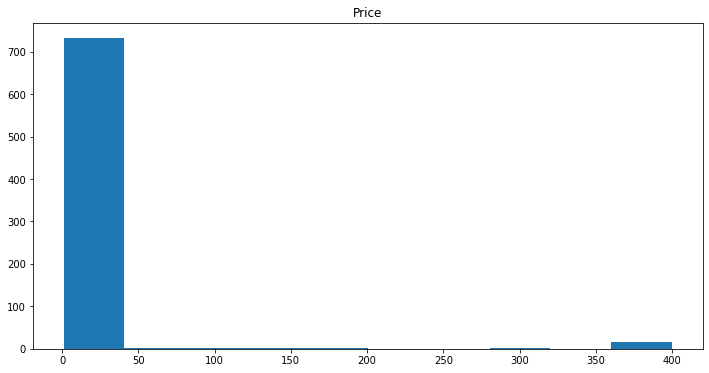

In [22]:
# Check column price
paid.hist(column="Price", grid = False, figsize=(12,6))

In [23]:
paid.sort_values(by='Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
277,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856,8.7,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
355,I am rich (Most expensive app),FINANCE,4.1,129,2.7,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
371,I am Rich!,FINANCE,3.8,93,22.0,"1,000+",399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
155,I Am Rich Premium,FINANCE,4.1,1867,4.7,"50,000+",399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


* Seems these apps are not only very niche, but they also would spoil our data, given how disparate the prices are from others.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe927b75048>]],
      dtype=object)

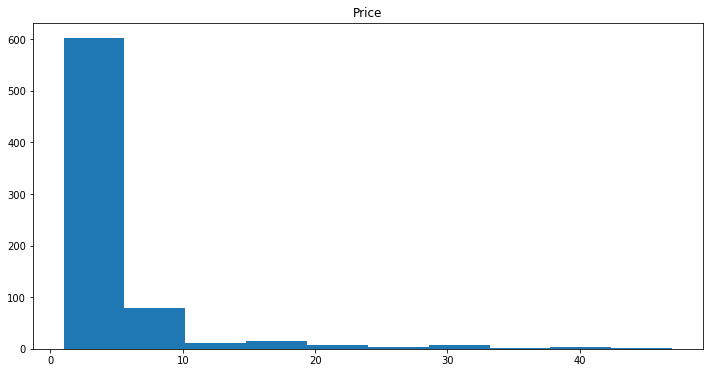

In [24]:
# Vast majority of apps have a price significantly below $50. restrict analysis to those rows
affordable_apps = paid[paid.Price < 50].copy()
affordable_apps.hist(column = "Price", grid = False, figsize=(12,6))

* Still quite skewed. Seems to be a clear difference between the amount of app costing less $5 and the remaining ones 

In [25]:
cheap = affordable_apps.Price < 5
reasonable = affordable_apps.Price >= 5

(array([65., 30., 16., 10.,  4.,  6.,  2.,  1.,  2.,  1.]),
 array([ 5.   ,  9.199, 13.398, 17.597, 21.796, 25.995, 30.194, 34.393,
        38.592, 42.791, 46.99 ]),
 <a list of 10 Patch objects>)

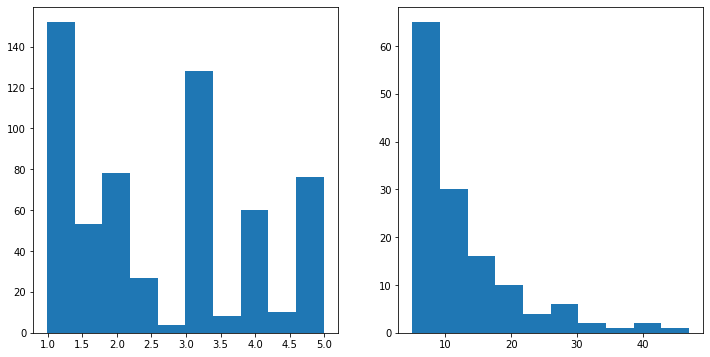

In [26]:
fig = plt.figure(figsize=(12,6))
c = fig.add_subplot(1,2,1)
c.hist(affordable_apps[cheap].Price)
#affordable_apps[cheap].hist(column = "Price")
r = fig.add_subplot(1,2,2)
r.hist(affordable_apps.loc[reasonable, 'Price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe92717ea58>]],
      dtype=object)

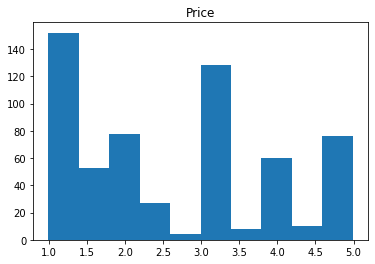

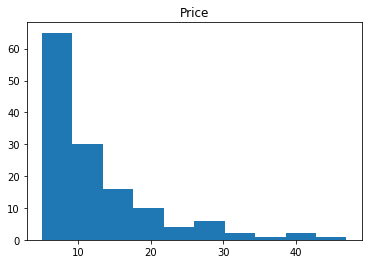

In [27]:
affordable_apps[cheap].hist(column="Price", grid = False)
affordable_apps[reasonable].hist(column = 'Price', grid = False)

In [28]:
affordable_apps['affordability'] = affordable_apps.Price.apply(lambda x : 'cheap' if x < 5 else 'reasonable')
affordable_apps.sample(5)
#affordable_apps["affordability"] = affordable_apps.apply(lambda row : 'cheap' if row['Price'] < 5 else 'reasonable',
#                                                        axis = 1)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability
481,Poker Equity Calculator Pro for No Limit Hold'em,GAME,4.0,21,14.00,"5,000+",0.99,Everyone,Card,"September 10, 2017",1.3,5.0 and up,cheap
135,AJ Jump: Animal Jam Kangaroos!,GAME,4.4,2975,42.00,"50,000+",1.99,Everyone,Arcade,"March 7, 2016",1.6,4.0 and up,cheap
313,m>notes notepad,PRODUCTIVITY,4.3,184,NaN,"1,000+",2.99,Everyone,Productivity,"December 4, 2015",Varies with device,2.2 and up,cheap
325,Advanced EX for HYUNDAI,TOOLS,2.7,168,0.17,"5,000+",4.99,Everyone,Tools,"March 14, 2015",1.10,1.6 and up,cheap
113,Mupen64Plus AE (N64 Emulator),GAME,4.2,4569,12.00,"100,000+",0.99,Everyone,Arcade,"January 19, 2014",2.4.4,2.0 and up,cheap


* Reasonable apps are still somewhat skewed, although much less so than the dataset as a whole.
* Compare price to the other columns

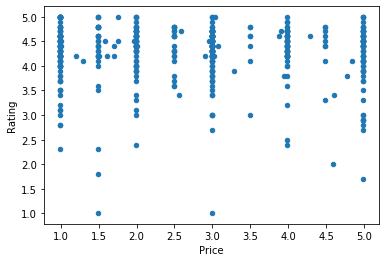

In [29]:
# Price relates to rating
affordable_apps[cheap].plot(kind = 'scatter', x = 'Price', y = 'Rating')

In [30]:
# Check Pearson correlation coefficient between Rating and Price
print(affordable_apps[cheap].corr().loc['Rating', 'Price'])

-0.05593771505463038


* almost no correlation, suggests that we can change prices without it being reflected in the apps' rating
* We can increase the price of those apps that cost less than, say, the mean cheap price, to the mean cheap price.

In [31]:
cheap_mean = affordable_apps[cheap].Price.mean()

* Create a new column price_criterion, 1 if price less than mean cheap, reasonable, 0 not less

In [32]:
affordable_apps.loc[cheap,'price_criterion'] = affordable_apps.apply(lambda row : 1 if row['Price'] < cheap_mean 
                                                                    else 0, axis = 1)
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,NaN
1,Hitman Sniper,GAME,4.6,408292,29.00,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.00,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,NaN
3,Bloons TD 5,FAMILY,4.6,190086,94.00,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0
4,Where's My Water?,FAMILY,4.7,188740,69.00,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Pureness Pacify (Android P) - Theme for Xperia™,PERSONALIZATION,NaN,0,3.60,1+,1.49,Everyone,Personalization,"July 23, 2018",1.2.A.Exceed.Paid,6.0 and up,cheap,1.0
751,ReDNAKET DB Normalization Tool,TOOLS,NaN,0,0.94,10+,0.99,Everyone,Tools,"February 3, 2016",1.0.2,5.0 and up,cheap,1.0
753,db Meter - sound level meter with data logging,TOOLS,NaN,0,15.00,1+,1.49,Everyone,Tools,"March 15, 2018",1.0.1,4.1 and up,cheap,1.0
754,EP Coding,MEDICAL,NaN,0,2.00,50+,0.99,Everyone,Medical,"October 5, 2017",1.6,4.0 and up,cheap,1.0


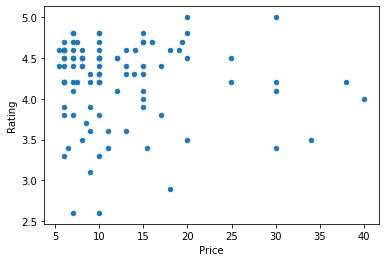

In [33]:
affordable_apps[reasonable].plot(kind = 'scatter', x = 'Price', y = 'Rating')

In [34]:
reasonable_mean = affordable_apps[reasonable].Price.mean()
affordable_apps.loc[reasonable, 'price_criterion'] = affordable_apps.Price.apply(lambda x : 1 
                                                                                if x < reasonable_mean else 0)
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0
1,Hitman Sniper,GAME,4.6,408292,29.00,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.00,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0
3,Bloons TD 5,FAMILY,4.6,190086,94.00,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0
4,Where's My Water?,FAMILY,4.7,188740,69.00,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Pureness Pacify (Android P) - Theme for Xperia™,PERSONALIZATION,NaN,0,3.60,1+,1.49,Everyone,Personalization,"July 23, 2018",1.2.A.Exceed.Paid,6.0 and up,cheap,1.0
751,ReDNAKET DB Normalization Tool,TOOLS,NaN,0,0.94,10+,0.99,Everyone,Tools,"February 3, 2016",1.0.2,5.0 and up,cheap,1.0
753,db Meter - sound level meter with data logging,TOOLS,NaN,0,15.00,1+,1.49,Everyone,Tools,"March 15, 2018",1.0.1,4.1 and up,cheap,1.0
754,EP Coding,MEDICAL,NaN,0,2.00,50+,0.99,Everyone,Medical,"October 5, 2017",1.6,4.0 and up,cheap,1.0


In [35]:
affordable_apps.shape

(733, 14)

In [36]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0


## In the interest of getting some quick results for our prototype, we'll now focus on the categories and genres, leaving other features for another time.

In [37]:
affordable_apps.Genres.unique()

array(['Arcade;Action & Adventure', 'Action', 'Strategy',
       'Puzzle;Brain Games', 'Card;Action & Adventure', 'Sports',
       'Personalization', 'Arcade', 'Puzzle', 'Productivity', 'Weather',
       'Tools', 'Sports;Action & Adventure', 'Communication',
       'Role Playing', 'Photography', 'Card', 'Simulation;Education',
       'Adventure', 'Education;Pretend Play', 'Lifestyle',
       'Strategy;Action & Adventure', 'Board', 'Finance',
       'Health & Fitness', 'Role Playing;Action & Adventure', 'Music',
       'Travel & Local', 'Business', 'Simulation',
       'Adventure;Action & Adventure', 'Parenting',
       'Adventure;Brain Games', 'Entertainment', 'Maps & Navigation',
       'Video Players & Editors', 'Racing', 'Medical', 'Auto & Vehicles',
       'Educational;Pretend Play', 'Casual;Pretend Play',
       'Education;Creativity', 'Education', 'Board;Brain Games',
       'Food & Drink', 'Action;Action & Adventure',
       'Simulation;Pretend Play', 'Dating', 'Books & Referenc

In [38]:
#Create a column that counts the number of genres to which each app belongs.
affordable_apps['genre_count'] = affordable_apps['Genres'].str.count(";")+1
#Count the occurance of ; in the Genre column above for each row, give us the number of separaters
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2
1,Hitman Sniper,GAME,4.6,408292,29.00,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.00,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1
3,Bloons TD 5,FAMILY,4.6,190086,94.00,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1
4,Where's My Water?,FAMILY,4.7,188740,69.00,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Pureness Pacify (Android P) - Theme for Xperia™,PERSONALIZATION,NaN,0,3.60,1+,1.49,Everyone,Personalization,"July 23, 2018",1.2.A.Exceed.Paid,6.0 and up,cheap,1.0,1
751,ReDNAKET DB Normalization Tool,TOOLS,NaN,0,0.94,10+,0.99,Everyone,Tools,"February 3, 2016",1.0.2,5.0 and up,cheap,1.0,1
753,db Meter - sound level meter with data logging,TOOLS,NaN,0,15.00,1+,1.49,Everyone,Tools,"March 15, 2018",1.0.1,4.1 and up,cheap,1.0,1
754,EP Coding,MEDICAL,NaN,0,2.00,50+,0.99,Everyone,Medical,"October 5, 2017",1.6,4.0 and up,cheap,1.0,1


In [39]:
genres_mean = affordable_apps.groupby(['affordability', 'genre_count']).mean()[['Price']]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

* Apps that belong to two genres are more expensive among the cheap apps and cheaper among the reasonable apps.

In [40]:
 def label_genres(row):
        """For each segment in 'genre_mean', labels the apps that cost less than its segment's 
        mean with '1', and the others with '0'."""
        aff = row['affordability']
        gc = row['genre_count']
        price = row['Price']
        if price < genres_mean.loc[(aff, gc)][0]:
            # groupby object slice
            return 1
        else:
            return 0
affordable_apps['genre_criterion'] = affordable_apps.apply(label_genres, axis = 'columns')

In [41]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1


In [42]:
genres_mean.index
# multiple index

MultiIndex([(     'cheap', 1),
            (     'cheap', 2),
            ('reasonable', 1),
            ('reasonable', 2)],
           names=['affordability', 'genre_count'])

In [43]:
# Create a dataframe that stores the mean price for each segment.
categories_mean = affordable_apps.groupby(['affordability', 'Category']).mean()[['Price']]

categories_mean.loc[('cheap', 'GAME')]

Price    2.547222
Name: (cheap, GAME), dtype: float64

In [44]:
categories_mean.loc[('cheap')]

,Price
Category,
ART_AND_DESIGN,1.990000
AUTO_AND_VEHICLES,1.740000
BOOKS_AND_REFERENCE,2.529286
BUSINESS,3.632857
COMMUNICATION,2.428846
DATING,3.115000
EDUCATION,3.990000
ENTERTAINMENT,3.990000
FAMILY,2.754740


In [45]:
def label_category(row):
    aff = row['affordability']
    cat = row['Category']
    price = row['Price']
    if price < categories_mean.loc[(aff, cat)][0]:
        return 1
    return 0
affordable_apps['category_criterion'] = affordable_apps.apply(label_category, axis = 'columns')

In [46]:
categories_mean.loc[('cheap','GAME')][0]

2.547222222222225

In [47]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1


## Majorigy voting
* In which we decide whether an app's price should increase based on all criteria.
* Imagine this is an election and each criterion is a voter. For each app, we're going to count the number of votes for each result, and the majority will be declared the winner. Note that since we have three criterions and two possible values for each criterion, ties are impossible.

In [48]:
# Create a column that takes the value of 1 when the majority is 1 and 0 when majority 0
criteria = ['price_criterion', 'genre_criterion', 'category_criterion']
affordable_apps['Result'] = affordable_apps[criteria].mode(axis= 'columns')

affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
523,Hospitalist Handbook,MEDICAL,4.8,12,18.0,"1,000+",19.99,Everyone,Medical,"June 5, 2017",6.0.4,4.1 and up,reasonable,0.0,1,0,0,0.0
620,EG Classroom Decimals™,FAMILY,3.0,2,18.0,50+,2.99,Everyone,Education;Education,"June 12, 2017",2.2.2,2.2 and up,cheap,0.0,2,1,0,0.0
724,EP McGuffey Primer,FAMILY,NaN,0,NaN,50+,1.99,Everyone,Education,"July 16, 2018",Varies with device,Varies with device,cheap,1.0,1,1,1,1.0
126,Toca Life: Hospital,EDUCATION,4.7,3528,24.0,"100,000+",3.99,Everyone,Education;Pretend Play,"June 12, 2018",1.1.1-play,4.4 and up,cheap,0.0,2,0,0,0.0
403,CE Map - Interactive Conan Exiles Map,MAPS_AND_NAVIGATION,4.5,62,1.6,"1,000+",0.99,Everyone,Maps & Navigation,"June 30, 2018",1.3,4.0 and up,cheap,1.0,1,1,1,1.0


In [49]:
# How many apps are eligible for a price increase
nr_eligible = affordable_apps['Result'].sum()
print(nr_eligible, nr_eligible/affordable_apps.shape[0], sep = '\n')

401.0
0.5470668485675307




We see that 401 apps — roughly 55% of the paid apps — are eligible for a price increase. This is a significant number, and we consider the possibility that increasing the price for these apps will have a significant impact.

Estimating the impact of a project, big or small, is an important part of publicizing your work. In an ideal world, we'd have the data for how many times each app was bought, but we don't.

We could potentially fall back on the number of installations as a proxy for this, but unfortunately, our Installs column just gives us ranges and not exact numbers.

In any case, given the lack of options, we'll fall back on this obviously faulty proxy in order to estimate the impact. In addition to it not being the main goal of this prototype, the lack of data also makes it hard to decide what the optimal price for each app is. Instead, we'll use the mean price of the affordability of the eligible apps when it is higher than the current price.

In [50]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1,1.0
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1,1.0
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0,0.0
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1,1.0


Create a column in affordable_apps called New Price that should be:

    The maximum between Price and cheap_mean for the cheap apps, rounded to two decimal places
    The maximum between Price and reasonable_mean for the reasonable apps, rounded to two decimal places

Transform Installs into a numeric column:

    Replace + and , with nothing.
    Pass int to the Series.astype method to transform Installs in a numeric column.

Compute the impact for each app:

    Compute the difference between the new price and the current price. Multiply it by Installs.
        Create a column in affordable_apps called Impact with this data.

Sum Impact. Assign it to total_impact.

In [51]:
cheap_mean = round(cheap_mean,2)
reasonable_mean = round(reasonable_mean, 2)

In [52]:
def new_price(row):
    if row['affordability'] == 'cheap':
        return round(max(row['Price'], cheap_mean), 2)
    else:
        return round(max(row['Price'], reasonable_mean), 2)

affordable_apps.loc[cheap, 'New Price'] = affordable_apps.apply((lambda row: cheap_mean if 
                                                               row['Price'] < cheap_mean 
                                                                else row['Price']), axis = 'columns')
affordable_apps.loc[reasonable, 'New Price'] = affordable_apps.apply((lambda row: reasonable_mean if 
                                                                    row['Price'] < reasonable_mean
                                                                     else row['Price']), axis = 'columns')
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New Price
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1,1.0,12.45
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0,2.58
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1,1.0,12.45
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0,0.0,2.99
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1,1.0,2.58


In [53]:
affordable_apps.Installs = affordable_apps.Installs.str.replace("[+,]", "").astype('int')
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New Price
0,Minecraft,FAMILY,4.5,2376564,NaN,10000000,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1,1.0,12.45
1,Hitman Sniper,GAME,4.6,408292,29.0,10000000,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0,2.58
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1,1.0,12.45
3,Bloons TD 5,FAMILY,4.6,190086,94.0,1000000,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0,0.0,2.99
4,Where's My Water?,FAMILY,4.7,188740,69.0,1000000,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1,1.0,2.58


In [54]:
affordable_apps['Impact'] = (affordable_apps['New Price'] -affordable_apps.Price)* affordable_apps.Installs
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New Price,Impact
0,Minecraft,FAMILY,4.5,2376564,NaN,10000000,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1,1.0,12.45,54600000.0
1,Hitman Sniper,GAME,4.6,408292,29.0,10000000,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0,2.58,15900000.0
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1,1.0,12.45,5460000.0
3,Bloons TD 5,FAMILY,4.6,190086,94.0,1000000,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0,0.0,2.99,0.0
4,Where's My Water?,FAMILY,4.7,188740,69.0,1000000,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1,1.0,2.58,590000.0


In [56]:
# Minimum estimated impact
# Minimum because the number of installations represents the low end of the range - it's not the actual number
# of installations
total_impact = affordable_apps.Impact.sum()
print(total_impact)

115441618.98


On the last screen, we computed the minimum estimated impact. Minimum because the number of installations represents the low end of the range — it's not the actual number of installations.

Our result was north of $115 million! This is too optimistic, especially considering that people can install the app, use the freeware version and not pay at all. The proxy failed, and that's okay. Data science resembles research and development more than it does procedural deterministic tasks; data practitioners are bound to run into some dead ends.

We fell short on evaluating the impact due to lack of data. A possible next step would be to request data concerning the number of purchases.

Before we clean up our findings for communication, let's list some possible next steps for this project:

    Include unused data in the analysis, specifically:
        The number of reviews;
        The size of the app;
        The content rating;
        The last time the app was updated;
        The app's Android versions;
    Analyze the data on multiple levels. For example, instead of just looking at categories and genres individually, we can see what happens for each valid combination of category and genre. Or category, genre and content rating, and so on.
    Get more rows on the dataset. We worked with roughly 700 hundrers apps, which makes it hard to drill down on multiple levels.
    Do advanced statistical analysis.
    Determine optimal prices for each app.
    Get data that allows us to better classify the undervalued apps and estimate the impact.


## Report model
* ## Strategy

In order to limit the scope of this prototype, we included only four more features in our analysis: the ratings, the affordability, the categories, and the genres.

We separated the data into price groups and broke those down according to category and genre to determine the candidates for price increases.

* ## Prices vs. Other Features

We've found there isn't any meaningful relationship between the price and the rating.

(Notice how we avoided mentioning the Pearson coefficient — it's a technical detail that isn't important to our audience.)

As an example, in the graph below, we have the price on the horizontal axis, and the rating on vertical axis. We see that price's column of data points are virtually indistinguishable from one another.

cheap_rating_price

(Notice also that we're only showing the graph for the cheap apps. Since the reasonable apps behave in the same way, there is no need to overload the presentation by including another graph. However, we can – and should – be able to explain what happens with the reasonable apps if anyone asks.)

As for the genres, since each app can belong to multiple genres, and given that we only have around 700 rows of data, we decided not to drill down into the genres, but instead limit our analysis to counting the number of genres for each app and computing the average.

(Notice that we didn't specify that we used the mean. In the English language, "average" can mean multiple things. It is usually used as a number that describes data in mass. That we used the mean, is another technical detail that is important for the analysis, but not important for the presentation.)
Affordability 	Genre Count 	Price
Cheap apps 	1 	2.51
Cheap apps 	2 	3.16
Reasonable Apps 	1 	12.57
Reasonable Apps 	2 	6.82

(We altered the table we saw during our work to make it more presentable. We modified the column names, we used the terms "cheap apps" and "reasonable apps", and we rounded the prices to two decimal places — we don't want our audience to lose the thread because they can't read the table).

We notice that cheap apps with multiple genres cost more than cheap apps with a single genre. The opposite happens among the reasonable apps.

For each app, the vote cast by the genres feature is determined by how the price of the app relates to the average of its number of genres: Those that cost less than the average are eligible for price increase.

As an example, suppose "An Amazing App" is a reasonable app that belongs to two genres. If its price is lower than $6.82, then the vote is that its price should increase.

We used a similar strategy for the categories: We computed the average for each category and cast the vote in analogous way.

(There is no need to show another example of the same thing, but we should be prepared to talk a little bit more about it, or show our work in case someone asks to see it.)

* ## Results and Impact

Upon casting the votes and finding the majority, out of the 733 apps that were analyzed, 401 apps (roughly 55%) were deemed eligible for a price increase.

To estimate the impact that increasing prices could have, we want to find the optimal price and have a sense of how many times each app will be purchased.

It wasn't the goal of this prototype to determine the optimal price, so as a quick proxy, we used the average price for each app's affordability. As for the amount of times each app will be purchased, we don't have access to the data, so we tried to use the number of installations instead.

However, this proxy turned out to be inaccurate and unrealistic, so we failed to estimate the impact with the given data.

In any case, given that roughly 60% of apps seem to be undervalued, our recommendation is that we move forward with this project. Here a few suggestions going forward.

(We should strive for a project to culminate in a recommendation and call to action.)

* ## Next Steps

Some possible next steps are:

    Including unused data in the analysis.
    Get more data, such as:
        More features — like the number of times each app was purchased.
        A greater volume of data (we were working with just a little over 700 data points).
    Select a sample of the eligible apps, increase their price and monitor the behavior of the purchases.
    Determine optimal prices for each app.
